In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import scikitplot as skplt
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
# load dataset
data=pd.read_csv("../dataset/diabetes.csv",names=col_names, header=0)
print("data shape: ", data.shape)
data.head()

data shape:  (768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[:,:-1] # Features
y = data.outcome

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:

(y.value_counts()/y.shape[0])*100
#(y_test.value_counts()/y_test.shape[0])*100
#(y_train.value_counts()/y_train.shape[0])*100

0    65.104167
1    34.895833
Name: outcome, dtype: float64

In [6]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

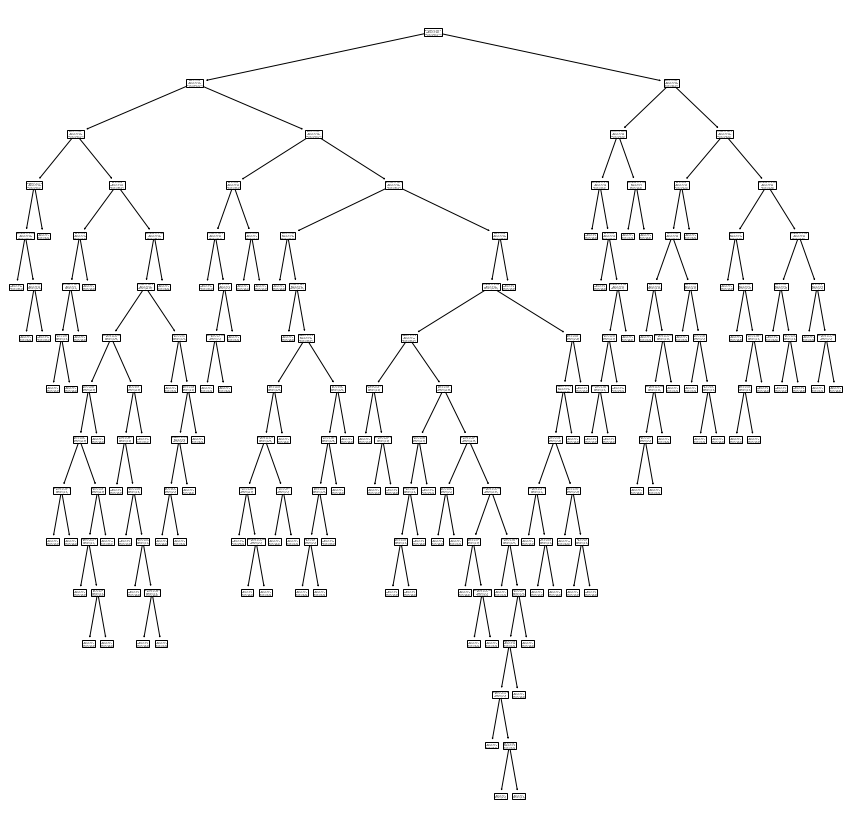

In [7]:
plt.figure(figsize=(15,15))
features=X.columns
tree.plot_tree(dtree,feature_names=X.columns,class_names=['True','False']);

In [8]:
#some function for more information about the tree 
print("Tree depth: ", dtree.get_depth())
print("number of leaves ", dtree.get_n_leaves())

#for feature importance
#print(dtree.feature_importances_)

Tree depth:  15
number of leaves  102


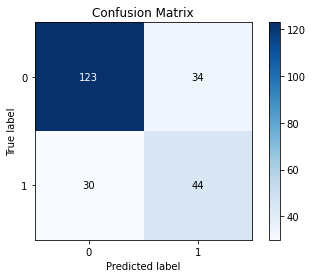

In [9]:
#Predict the response for test dataset
predictions = dtree.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, predictions)

In [10]:
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7229437229437229
F1 0.5789473684210528


## Impact of max_depth

In [11]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=0)
parameters = {'max_depth':range(1,20)}
dt_cv = GridSearchCV(dt, parameters,cv=5, return_train_score=True,scoring="f1")
dt_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1

In [12]:
# scores of GridSearch CV
scores = dt_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004988,0.000632,0.003391,0.000490,1,{'max_depth': 1},0.407407,0.617647,0.603175,0.595745,...,0.550061,0.078140,6,0.547826,0.581673,0.590038,0.672673,0.603053,0.599053,0.041093
1,0.003788,0.000748,0.002196,0.000398,2,{'max_depth': 2},0.407407,0.617647,0.603175,0.560976,...,0.543133,0.075272,8,0.547826,0.581673,0.590038,0.692580,0.603053,0.603034,0.048356
2,0.004189,0.000398,0.002593,0.000488,3,{'max_depth': 3},0.377358,0.474576,0.571429,0.558140,...,0.496172,0.069570,19,0.545455,0.549550,0.564103,0.734177,0.613546,0.601366,0.070692
3,0.004188,0.000976,0.002204,0.000393,4,{'max_depth': 4},0.666667,0.696629,0.720000,0.533333,...,0.645618,0.067016,1,0.744479,0.738170,0.733119,0.749091,0.761394,0.745251,0.009729
4,0.005771,0.000391,0.002803,0.000405,5,{'max_depth': 5},0.692308,0.613333,0.606061,0.434783,...,0.583209,0.084364,2,0.777778,0.755396,0.734082,0.795539,0.777143,0.767988,0.021198


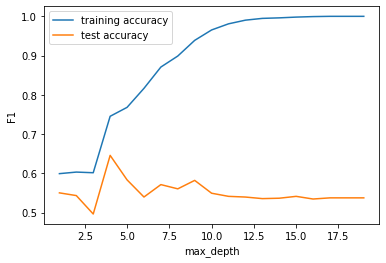

{'max_depth': 4}


In [13]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("F1")
plt.legend()
plt.show()
print(dt_cv.best_params_)

In [14]:
DT=DecisionTreeClassifier(max_depth=4, random_state=0)
DT.fit(X_train,y_train)
predictions = DT.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7489177489177489
F1 0.6184210526315789


## impact of min_samples_split

In [15]:
dt=DecisionTreeClassifier(max_depth=4, random_state=0)
parameters = {'min_samples_split': range(2,150,10)}
dt_cv = GridSearchCV(dt, parameters,cv=5, return_train_score=True,scoring="f1")
dt_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(2, 150, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
 

In [16]:
# scores of GridSearch CV
scores = dt_cv.cv_results_
pd.DataFrame(scores).head();

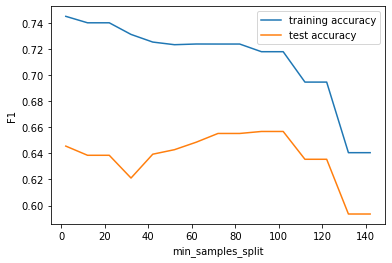

{'min_samples_split': 92}


In [17]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("F1")
plt.legend()
plt.show()
print(dt_cv.best_params_)

In [18]:
DT=DecisionTreeClassifier(min_samples_split=92,max_depth=4, random_state=0)
DT.fit(X_train,y_train)
predictions = DT.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7489177489177489
F1 0.6027397260273972
